In [1]:
from models import LeNet5

In [2]:
import torch
import random
import numpy as np
from scripts import MNISTCSV
from torch.utils.data import DataLoader

seed = 42
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)


if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed) 

batch_size = 64

train_csv_path = "data/MNIST/mnist_train.csv"
test_csv_path = "data/MNIST/mnist_test.csv"

train_dataset = MNISTCSV(train_csv_path)
test_dataset = MNISTCSV(test_csv_path)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [3]:
model = LeNet5()

In [4]:
import torch.optim as optim
import itertools

optimizers = [optim.SGD]


lr_ranges = [
    [round(x / 100, 100) for x in list(range(550, 440, -10))],
    # 0.5, 0.45, ..., 0.15
]
lrs = list(itertools.chain(*lr_ranges))


epochs = [5]


hyperparameters = [
    {"optimizer": opt, "lr": lr, "epochs": ep}
    for ep in epochs
    for lr in lrs
    for opt in optimizers
]


print(f"Nombre total de combinaisons : {len(hyperparameters)}")
for i, hp in enumerate(hyperparameters[:15]):
    print(f"Combinaison {i + 1} : {hp}")

Nombre total de combinaisons : 11
Combinaison 1 : {'optimizer': <class 'torch.optim.sgd.SGD'>, 'lr': 5.5, 'epochs': 5}
Combinaison 2 : {'optimizer': <class 'torch.optim.sgd.SGD'>, 'lr': 5.4, 'epochs': 5}
Combinaison 3 : {'optimizer': <class 'torch.optim.sgd.SGD'>, 'lr': 5.3, 'epochs': 5}
Combinaison 4 : {'optimizer': <class 'torch.optim.sgd.SGD'>, 'lr': 5.2, 'epochs': 5}
Combinaison 5 : {'optimizer': <class 'torch.optim.sgd.SGD'>, 'lr': 5.1, 'epochs': 5}
Combinaison 6 : {'optimizer': <class 'torch.optim.sgd.SGD'>, 'lr': 5.0, 'epochs': 5}
Combinaison 7 : {'optimizer': <class 'torch.optim.sgd.SGD'>, 'lr': 4.9, 'epochs': 5}
Combinaison 8 : {'optimizer': <class 'torch.optim.sgd.SGD'>, 'lr': 4.8, 'epochs': 5}
Combinaison 9 : {'optimizer': <class 'torch.optim.sgd.SGD'>, 'lr': 4.7, 'epochs': 5}
Combinaison 10 : {'optimizer': <class 'torch.optim.sgd.SGD'>, 'lr': 4.6, 'epochs': 5}
Combinaison 11 : {'optimizer': <class 'torch.optim.sgd.SGD'>, 'lr': 4.5, 'epochs': 5}


In [15]:
import torch.nn as nn
import torch.optim as optim
from scripts import train_model_and_save


def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


def initialize_weights(model):
    for layer in model.modules():
        if isinstance(layer, nn.Conv2d) or isinstance(layer, nn.Linear):
            nn.init.xavier_uniform_(layer.weight)
            if layer.bias is not None:
                nn.init.zeros_(layer.bias)



SEED = 42
set_seed(SEED)

for i, params in enumerate(hyperparameters):
    print(f"\n--- Training Model {i + 1} ---\n")
    print("params : ", params)

    
    set_seed(SEED)

    
    model = LeNet5()
    initialize_weights(model)

    optimizer = params["optimizer"](model.parameters(), lr=params["lr"])

    criterion = nn.CrossEntropyLoss()

    train_model_and_save(
        model,
        train_loader,
        criterion,
        optimizer,
        params["epochs"],
        learning_rate=params["lr"],
        metadata_dir="models/saved_models_metadataV2",
        model_dir="models/saved_modelsV2",
    )


--- Training Model 1 ---

params :  {'optimizer': <class 'torch.optim.sgd.SGD'>, 'lr': 5.5, 'epochs': 5}
Saved initial random weights at Epoch 0 to models/saved_modelsV2\model_fdf6c55f-7ec0-422e-9285-a70ad960f09a_epoch0.pth
Epoch 1/5, Loss: 1.9501473408009706
Epoch 2/5, Loss: 2.0688501939590553
Epoch 3/5, Loss: 1.979545307566108
Epoch 4/5, Loss: 2.0445181843060167
Epoch 5/5, Loss: 1.9966857715456217
Training complete. Metadata saved to models/saved_models_metadataV2\metadata_fdf6c55f-7ec0-422e-9285-a70ad960f09a.json.

--- Training Model 2 ---

params :  {'optimizer': <class 'torch.optim.sgd.SGD'>, 'lr': 5.4, 'epochs': 5}
Saved initial random weights at Epoch 0 to models/saved_modelsV2\model_525e2042-9ad9-4e93-a37a-5e86c1bb5c57_epoch0.pth
Epoch 1/5, Loss: 1.7070571251197664
Epoch 2/5, Loss: 1.8748719505409697
Epoch 3/5, Loss: 1.9630216357550387
Epoch 4/5, Loss: 2.074278864016665
Epoch 5/5, Loss: 2.166019727553386
Training complete. Metadata saved to models/saved_models_metadataV2\metad

Learning rate: 4.5, Metadata ID: 61e010b4-2adb-45c9-8fa5-4640bb743981
models\saved_models_metadataV2\metadata_61e010b4-2adb-45c9-8fa5-4640bb743981.json


C:\Users\cypri\AppData\Local\Temp\ipykernel_41236\2967740728.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights_k = torch.load(model_path_k)
C:\Users\cypri\AppData

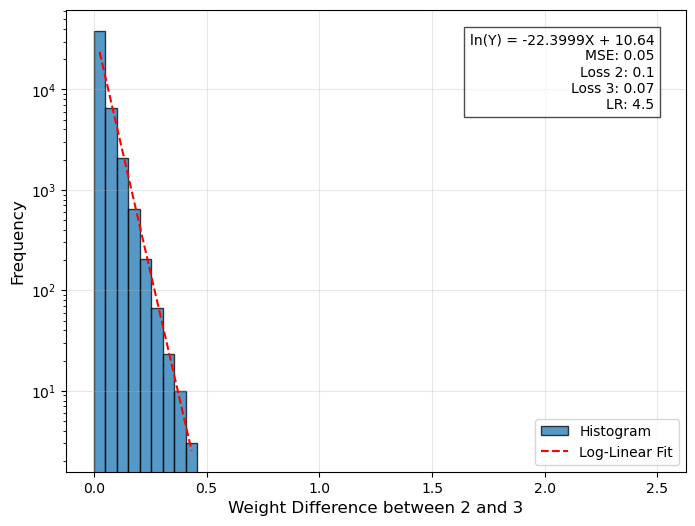

Learning rate: 4.6, Metadata ID: e6e30302-dc31-4389-a858-b93deba41766
models\saved_models_metadataV2\metadata_e6e30302-dc31-4389-a858-b93deba41766.json


C:\Users\cypri\AppData\Local\Temp\ipykernel_41236\2967740728.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights_k = torch.load(model_path_k)
C:\Users\cypri\AppData

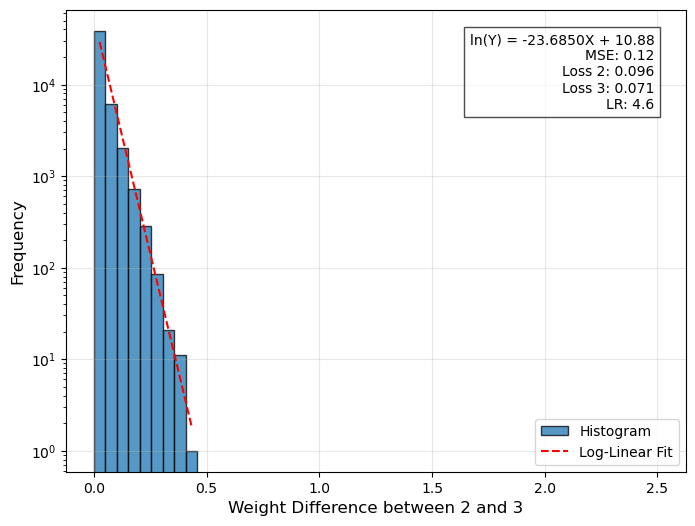

Learning rate: 4.7, Metadata ID: 47a96507-4106-4ca4-aab1-a05dd8649e13
models\saved_models_metadataV2\metadata_47a96507-4106-4ca4-aab1-a05dd8649e13.json


C:\Users\cypri\AppData\Local\Temp\ipykernel_41236\2967740728.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights_k = torch.load(model_path_k)
C:\Users\cypri\AppData

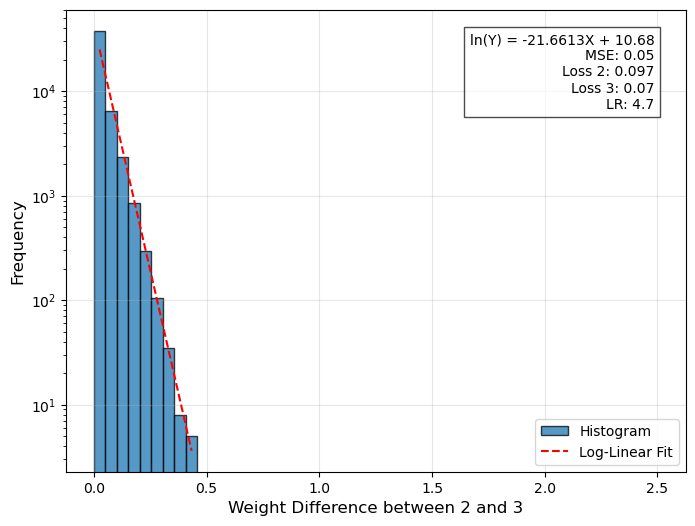

Learning rate: 4.8, Metadata ID: 49ff8233-8dec-4ca9-a950-ee81c0e81a80
models\saved_models_metadataV2\metadata_49ff8233-8dec-4ca9-a950-ee81c0e81a80.json


C:\Users\cypri\AppData\Local\Temp\ipykernel_41236\2967740728.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights_k = torch.load(model_path_k)
C:\Users\cypri\AppData

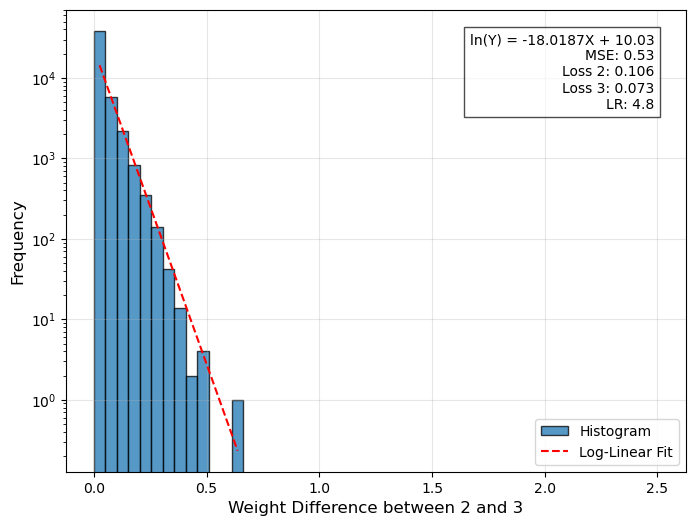

Learning rate: 4.9, Metadata ID: f37eca6f-9b3d-4796-b348-fc3d3b3acbf0
models\saved_models_metadataV2\metadata_f37eca6f-9b3d-4796-b348-fc3d3b3acbf0.json


C:\Users\cypri\AppData\Local\Temp\ipykernel_41236\2967740728.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights_k = torch.load(model_path_k)
C:\Users\cypri\AppData

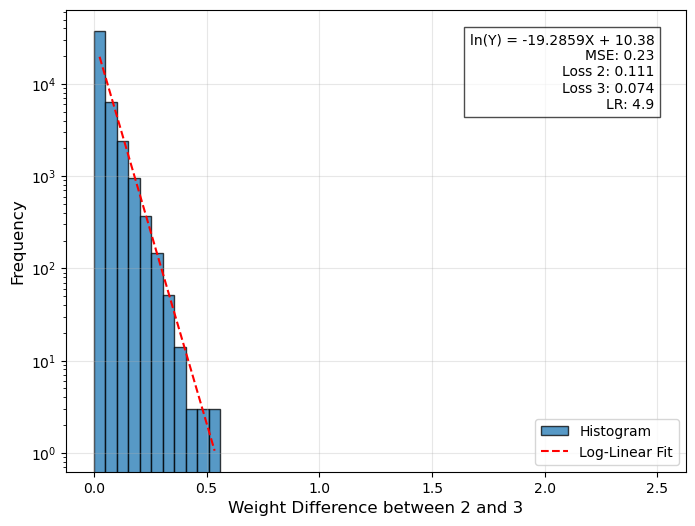

Learning rate: 5.0, Metadata ID: c44ed5f0-1ac8-4c19-a376-3680d55d239a
models\saved_models_metadataV2\metadata_c44ed5f0-1ac8-4c19-a376-3680d55d239a.json


C:\Users\cypri\AppData\Local\Temp\ipykernel_41236\2967740728.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights_k = torch.load(model_path_k)
C:\Users\cypri\AppData

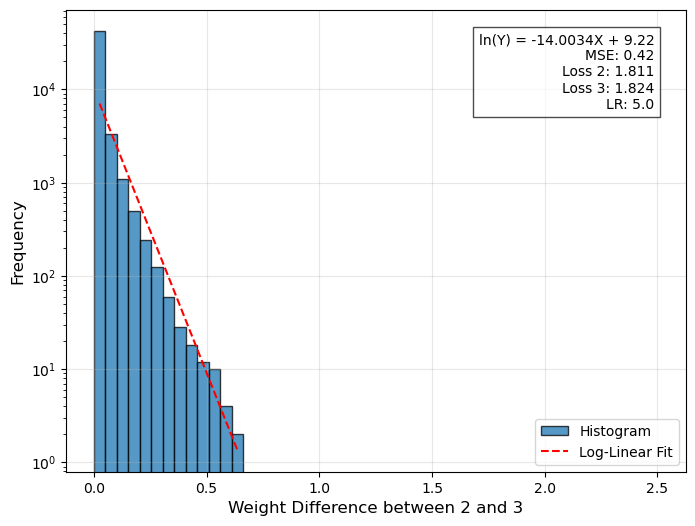

Learning rate: 5.1, Metadata ID: ff308d82-717d-468b-abe7-fc0400ac45c7
models\saved_models_metadataV2\metadata_ff308d82-717d-468b-abe7-fc0400ac45c7.json


C:\Users\cypri\AppData\Local\Temp\ipykernel_41236\2967740728.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights_k = torch.load(model_path_k)
C:\Users\cypri\AppData

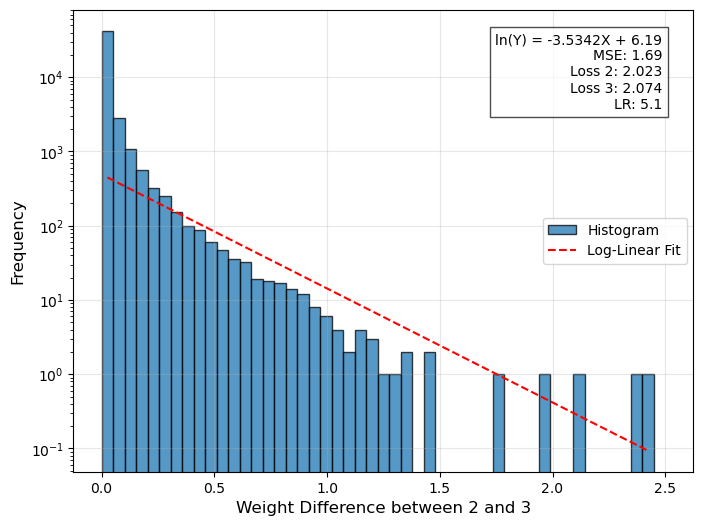

Learning rate: 5.2, Metadata ID: e6278f3c-2fd5-4e1f-b561-8c8cf1e65994
models\saved_models_metadataV2\metadata_e6278f3c-2fd5-4e1f-b561-8c8cf1e65994.json


C:\Users\cypri\AppData\Local\Temp\ipykernel_41236\2967740728.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights_k = torch.load(model_path_k)
C:\Users\cypri\AppData

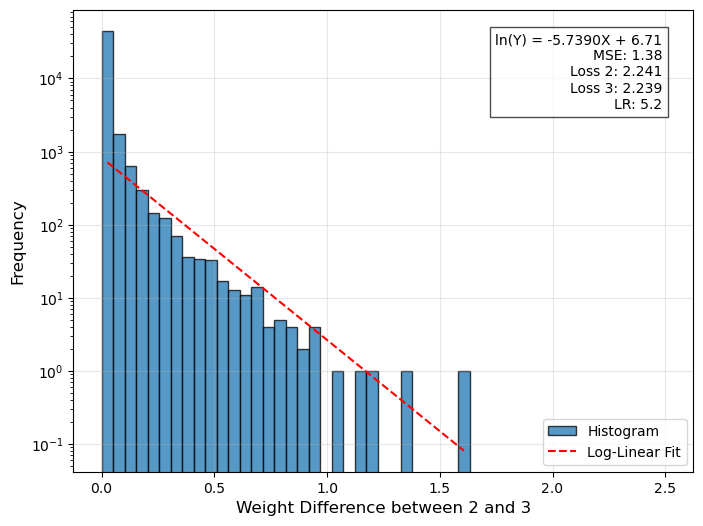

Learning rate: 5.3, Metadata ID: 9787707a-8a49-4d89-8bce-102274f962ea
models\saved_models_metadataV2\metadata_9787707a-8a49-4d89-8bce-102274f962ea.json


C:\Users\cypri\AppData\Local\Temp\ipykernel_41236\2967740728.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights_k = torch.load(model_path_k)
C:\Users\cypri\AppData

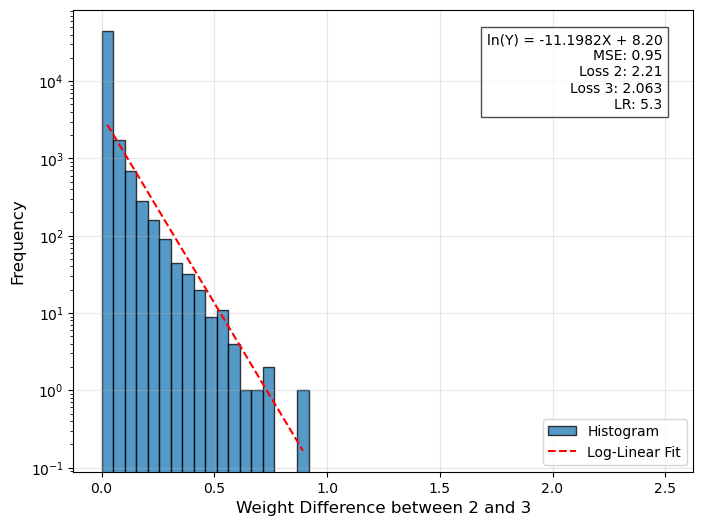

Learning rate: 5.4, Metadata ID: 525e2042-9ad9-4e93-a37a-5e86c1bb5c57
models\saved_models_metadataV2\metadata_525e2042-9ad9-4e93-a37a-5e86c1bb5c57.json


C:\Users\cypri\AppData\Local\Temp\ipykernel_41236\2967740728.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights_k = torch.load(model_path_k)
C:\Users\cypri\AppData

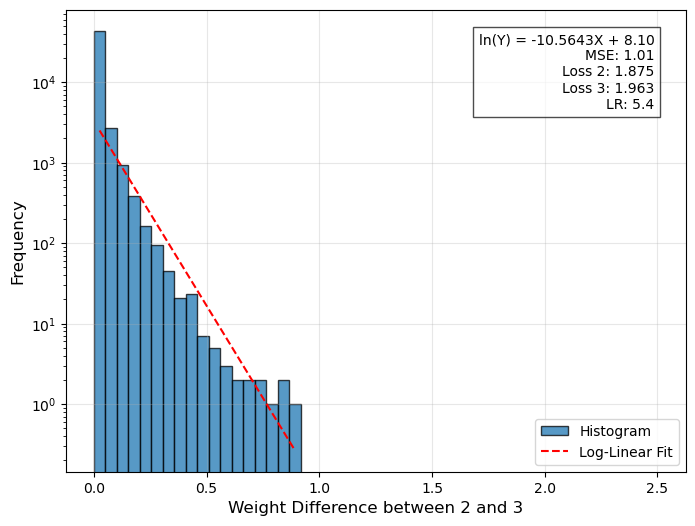

Learning rate: 5.5, Metadata ID: fdf6c55f-7ec0-422e-9285-a70ad960f09a
models\saved_models_metadataV2\metadata_fdf6c55f-7ec0-422e-9285-a70ad960f09a.json


C:\Users\cypri\AppData\Local\Temp\ipykernel_41236\2967740728.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights_k = torch.load(model_path_k)
C:\Users\cypri\AppData

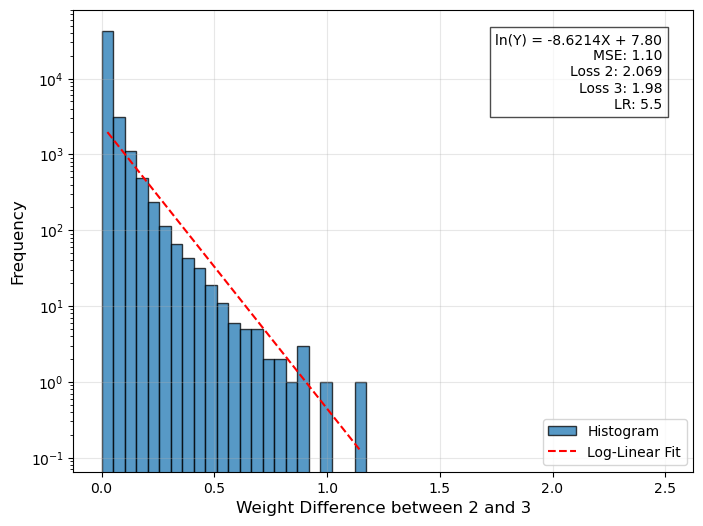

In [2]:
import os
import json
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


def plot_layer_weight_differences(
    parent_id,
    epoch,
    layers=("fc1", "fc2", "fc3"),
    metadata_dir="models\\saved_models_metadataV2",
    xlim=2.5,
):

    metadata_path = os.path.join(metadata_dir, f"metadata_{parent_id}.json")
    if not os.path.exists(metadata_path):
        raise FileNotFoundError(f"Metadata file for parent_id {parent_id} not found.")

    print(metadata_path)

    with open(metadata_path, "r") as file:
        metadata = json.load(file)

    epoch_details = metadata.get("epoch_details", [])

    if epoch >= len(epoch_details) - 1:
        raise ValueError(
            f"Invalid epoch {epoch}. Choose a value between 0 and {len(epoch_details) - 2}."
        )

    model_path_k = epoch_details[epoch]["model_path"]
    model_path_k1 = epoch_details[epoch + 1]["model_path"]

    loss_k = round(epoch_details[epoch]["loss"], 3)
    loss_k1 = round(epoch_details[epoch + 1]["loss"], 3)

    learning_rate = metadata.get("learning_rate", None)

    if not os.path.exists(model_path_k) or not os.path.exists(model_path_k1):
        raise FileNotFoundError(
            f"Model file for epoch {epoch} or {epoch + 1} not found."
        )

    
    weights_k = torch.load(model_path_k)
    weights_k1 = torch.load(model_path_k1)

    for layer in layers:
        layer_key_weight = f"{layer}.weight"

        if layer_key_weight in weights_k and layer_key_weight in weights_k1:
            weight_diff = torch.abs(
                weights_k[layer_key_weight] - weights_k1[layer_key_weight]
            )
            weight_diff = weight_diff.view(-1).numpy()

           
            bins = np.linspace(0, xlim, 50)  
            freq, bin_edges = np.histogram(
                weight_diff, bins=bins
            )  

           
            bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

            # Filter out zero frequencies to avoid log(0)
            nonzero_mask = freq > 0
            X = bin_midpoints[nonzero_mask].reshape(-1, 1)  # Reshape for sklearn
            y_log = np.log(freq[nonzero_mask])  # Log-transform frequencies

            # Perform linear regression on log-transformed y
            model = LinearRegression()
            model.fit(X, y_log)

            a = model.coef_[0]  # Slope
            b = model.intercept_  # Intercept

            # Compute Mean Squared Error (MSE)
            y_log_pred = model.predict(X)  # Predicted log values
            mse = mean_squared_error(y_log, y_log_pred)

            # Convert back to original scale (exp to undo log)
            y_pred = np.exp(y_log_pred)

            # Plot histogram
            plt.figure(figsize=(8, 6))
            plt.hist(
                weight_diff, bins=bins, alpha=0.75, edgecolor="black", label="Histogram"
            )
            plt.yscale("log")
            plt.xlabel(f"Weight Difference between {epoch} and {epoch +1}", fontsize=12)
            plt.ylabel("Frequency", fontsize=12)

            # Plot Regression Line (on original scale)
            plt.plot(X, y_pred, color="red", linestyle="dashed", label="Log-Linear Fit")

            # Display regression parameters and MSE
            plt.text(
                0.95,
                0.95,
                f"ln(Y) = {a:.4f}X + {b:.2f}\nMSE: {mse:.2f}\n"
                f"Loss {epoch}: {loss_k}\nLoss {epoch + 1}: {loss_k1}\nLR: {learning_rate}",
                fontsize=10,
                transform=plt.gca().transAxes,
                verticalalignment="top",
                horizontalalignment="right",
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="black"),
            )

            plt.grid(alpha=0.3)
            plt.legend()
            plt.show()


import os
import json
import re

# Pattern to extract metadata ID
pattern = r"metadata_(.+)\.json"

# List to store learning rates and corresponding metadata
metadata_with_lr = []

# Directory containing the metadata files
metadata_dir = "models/saved_models_metadataV2"

# Iterate over files in the metadata directory
for name in os.listdir(metadata_dir):
    metadata_path = os.path.join(metadata_dir, name)

    # Only process JSON files
    if name.endswith(".json"):
        with open(metadata_path, "r") as file:
            metadata = json.load(file)

        # Get learning rate
        learning_rate = metadata.get("learning_rate", None)

        # Extract metadata ID
        extracted_metadata = re.findall(pattern, name)

        if extracted_metadata:
            metadata_with_lr.append((learning_rate, extracted_metadata[0]))

# Sort metadata by learning rate (ascending)
metadata_with_lr.sort(key=lambda x: x[0] if x[0] is not None else float("inf"))

# Iterate over sorted metadata and call the plotting function
for learning_rate, metadata_id in metadata_with_lr:
    print(f"Learning rate: {learning_rate}, Metadata ID: {metadata_id}")
    plot_layer_weight_differences(metadata_id, 2, ("fc1",))

Learning rate: 4.5, Metadata ID: 61e010b4-2adb-45c9-8fa5-4640bb743981
models\saved_models_metadataV2\metadata_61e010b4-2adb-45c9-8fa5-4640bb743981.json


C:\Users\cypri\AppData\Local\Temp\ipykernel_32004\28193593.py:56: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights_k = torch.load(model_path_k)
C:\Users\cypri\AppData\L

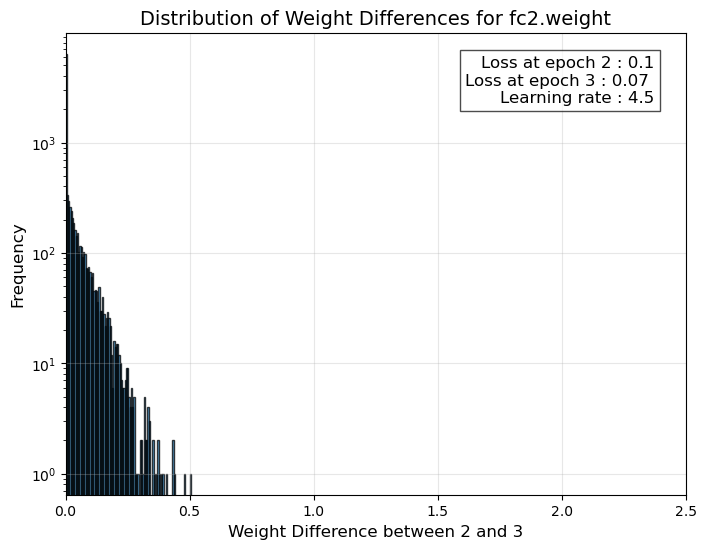

Learning rate: 4.6, Metadata ID: e6e30302-dc31-4389-a858-b93deba41766
models\saved_models_metadataV2\metadata_e6e30302-dc31-4389-a858-b93deba41766.json


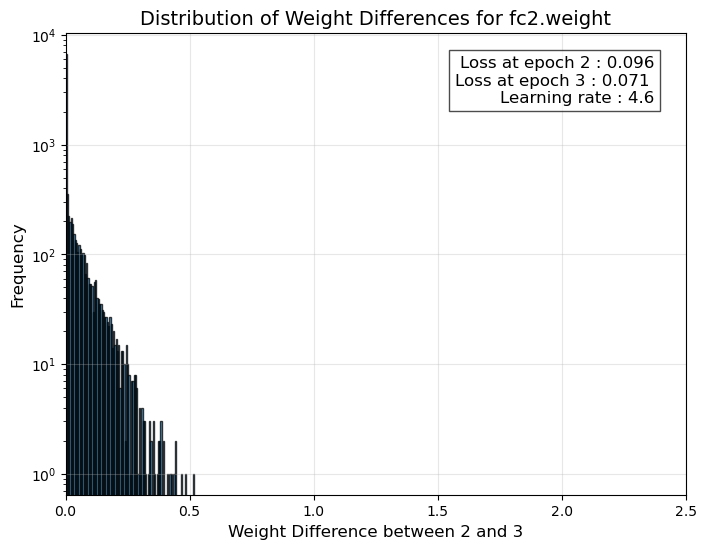

Learning rate: 4.7, Metadata ID: 47a96507-4106-4ca4-aab1-a05dd8649e13
models\saved_models_metadataV2\metadata_47a96507-4106-4ca4-aab1-a05dd8649e13.json


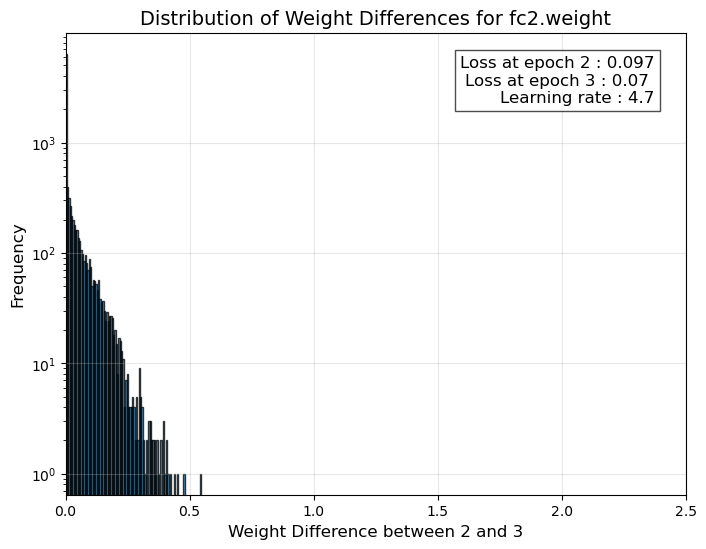

Learning rate: 4.8, Metadata ID: 49ff8233-8dec-4ca9-a950-ee81c0e81a80
models\saved_models_metadataV2\metadata_49ff8233-8dec-4ca9-a950-ee81c0e81a80.json


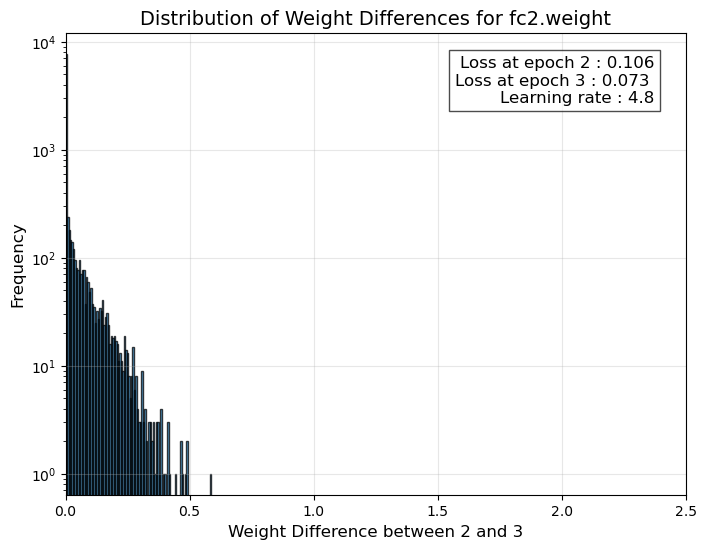

Learning rate: 4.9, Metadata ID: f37eca6f-9b3d-4796-b348-fc3d3b3acbf0
models\saved_models_metadataV2\metadata_f37eca6f-9b3d-4796-b348-fc3d3b3acbf0.json


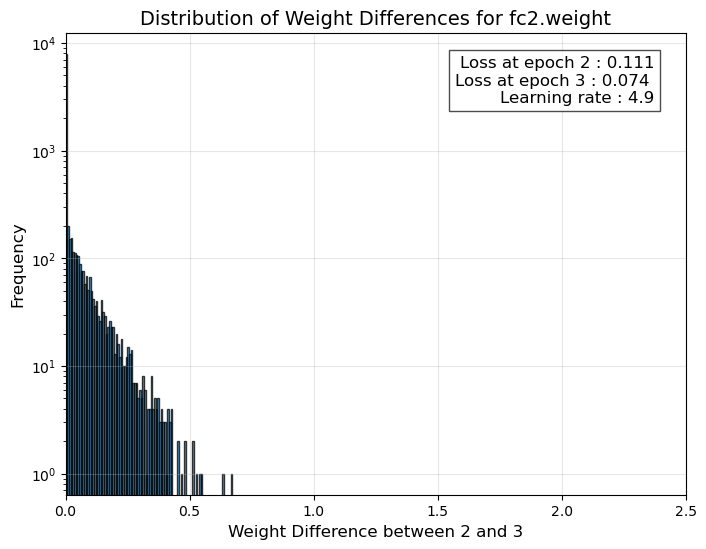

Learning rate: 5.0, Metadata ID: c44ed5f0-1ac8-4c19-a376-3680d55d239a
models\saved_models_metadataV2\metadata_c44ed5f0-1ac8-4c19-a376-3680d55d239a.json


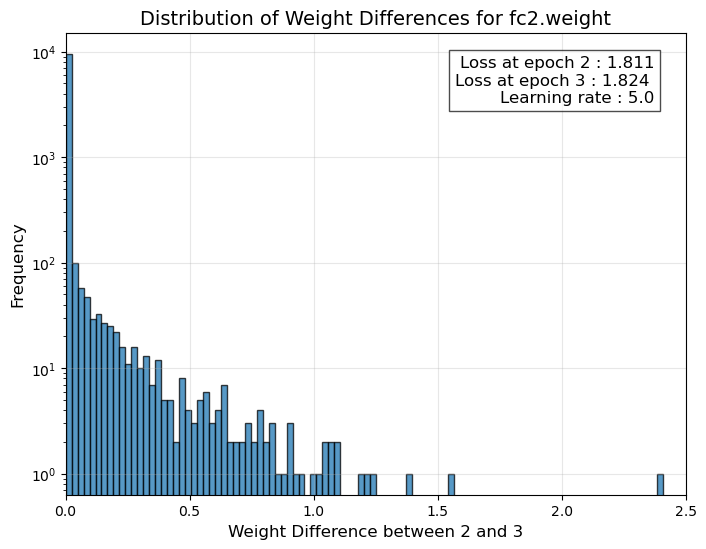

Learning rate: 5.1, Metadata ID: ff308d82-717d-468b-abe7-fc0400ac45c7
models\saved_models_metadataV2\metadata_ff308d82-717d-468b-abe7-fc0400ac45c7.json


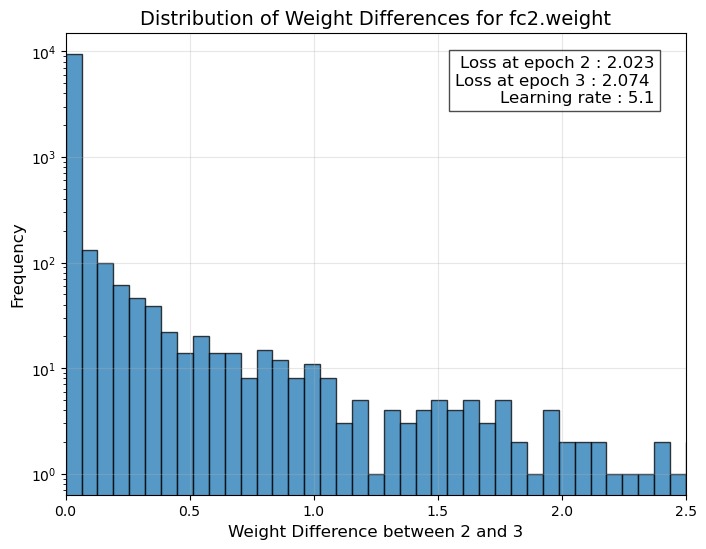

Learning rate: 5.2, Metadata ID: e6278f3c-2fd5-4e1f-b561-8c8cf1e65994
models\saved_models_metadataV2\metadata_e6278f3c-2fd5-4e1f-b561-8c8cf1e65994.json


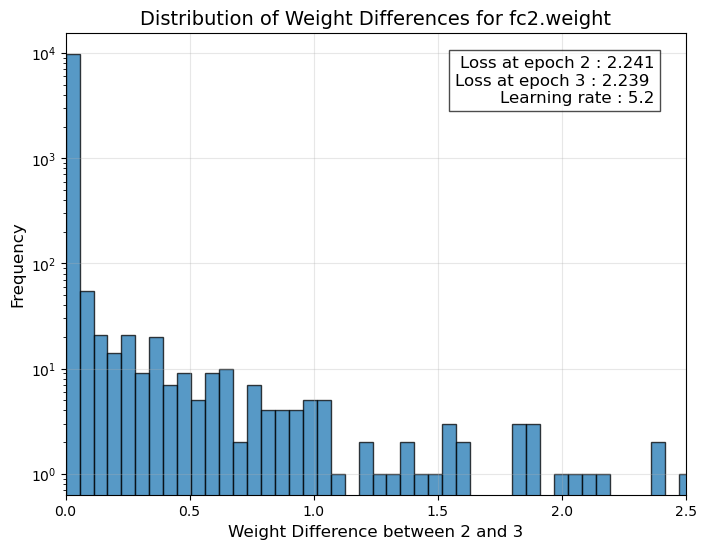

Learning rate: 5.3, Metadata ID: 9787707a-8a49-4d89-8bce-102274f962ea
models\saved_models_metadataV2\metadata_9787707a-8a49-4d89-8bce-102274f962ea.json


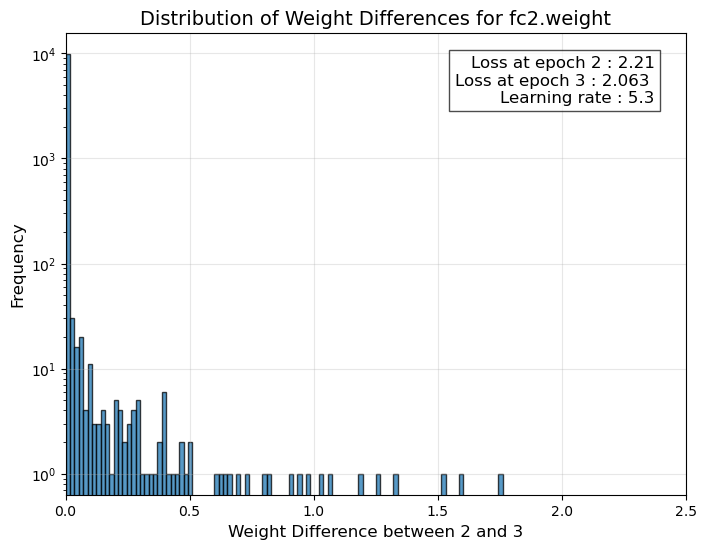

Learning rate: 5.4, Metadata ID: 525e2042-9ad9-4e93-a37a-5e86c1bb5c57
models\saved_models_metadataV2\metadata_525e2042-9ad9-4e93-a37a-5e86c1bb5c57.json


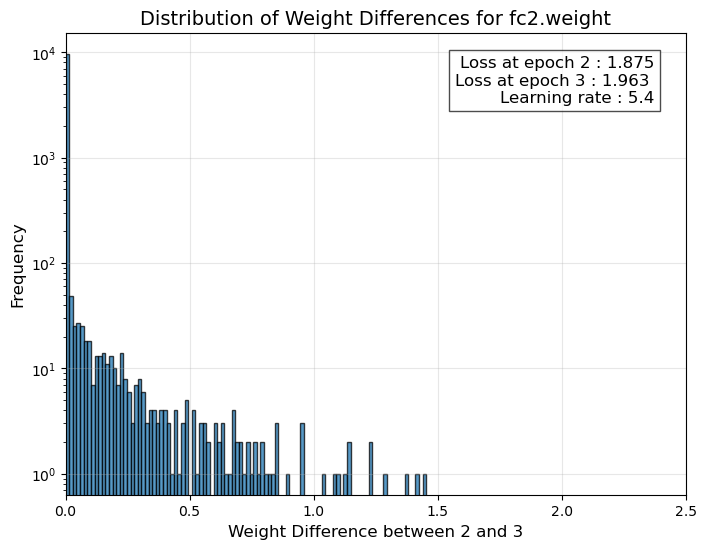

Learning rate: 5.5, Metadata ID: fdf6c55f-7ec0-422e-9285-a70ad960f09a
models\saved_models_metadataV2\metadata_fdf6c55f-7ec0-422e-9285-a70ad960f09a.json


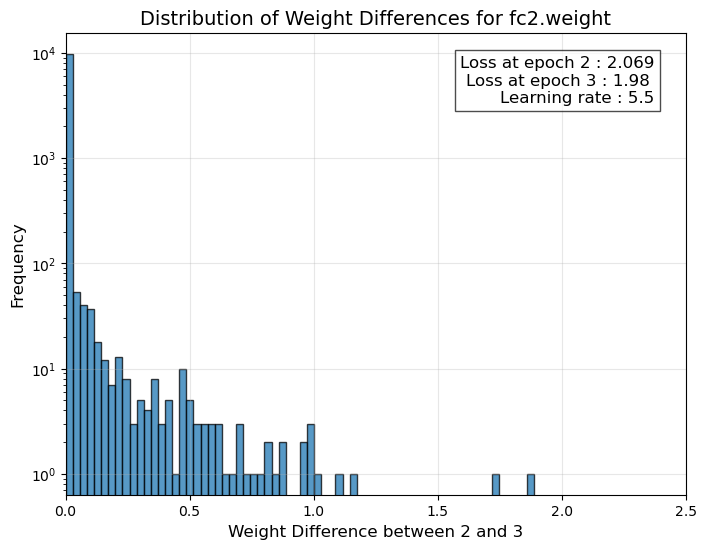

In [8]:
import os
import json
import re

# Pattern to extract metadata ID
pattern = r"metadata_(.+)\.json"

# List to store learning rates and corresponding metadata
metadata_with_lr = []

# Directory containing the metadata files
metadata_dir = "models/saved_models_metadataV2"

# Iterate over files in the metadata directory
for name in os.listdir(metadata_dir):
    metadata_path = os.path.join(metadata_dir, name)

    # Only process JSON files
    if name.endswith(".json"):
        with open(metadata_path, "r") as file:
            metadata = json.load(file)

        # Get learning rate
        learning_rate = metadata.get("learning_rate", None)

        # Extract metadata ID
        extracted_metadata = re.findall(pattern, name)

        if extracted_metadata:
            metadata_with_lr.append((learning_rate, extracted_metadata[0]))

# Sort metadata by learning rate (ascending)
metadata_with_lr.sort(key=lambda x: x[0] if x[0] is not None else float("inf"))

# Iterate over sorted metadata and call the plotting function
for learning_rate, metadata_id in metadata_with_lr:
    print(f"Learning rate: {learning_rate}, Metadata ID: {metadata_id}")
    plot_layer_weight_differences(metadata_id, 2, ("fc2",))

Learning rate: 4.5, Metadata ID: 61e010b4-2adb-45c9-8fa5-4640bb743981
models\saved_models_metadataV2\metadata_61e010b4-2adb-45c9-8fa5-4640bb743981.json


C:\Users\cypri\AppData\Local\Temp\ipykernel_32004\28193593.py:56: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights_k = torch.load(model_path_k)
C:\Users\cypri\AppData\L

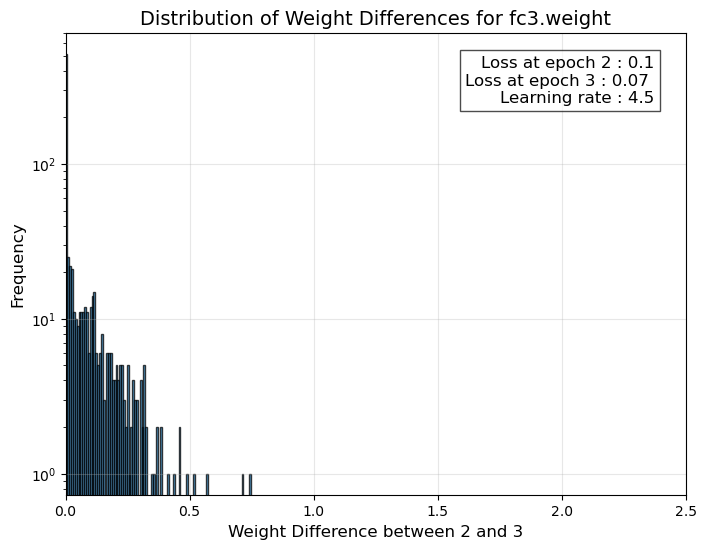

Learning rate: 4.6, Metadata ID: e6e30302-dc31-4389-a858-b93deba41766
models\saved_models_metadataV2\metadata_e6e30302-dc31-4389-a858-b93deba41766.json


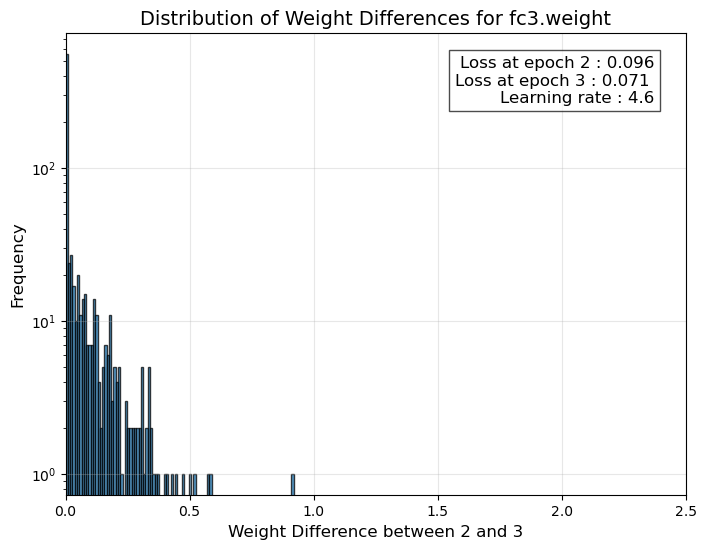

Learning rate: 4.7, Metadata ID: 47a96507-4106-4ca4-aab1-a05dd8649e13
models\saved_models_metadataV2\metadata_47a96507-4106-4ca4-aab1-a05dd8649e13.json


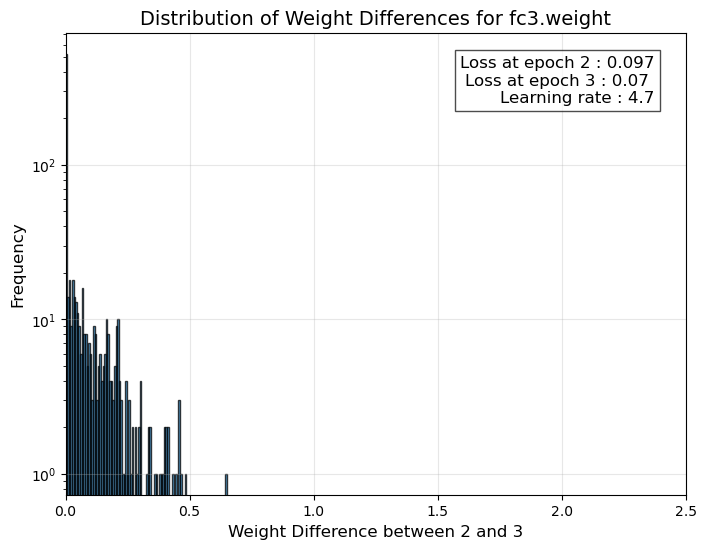

Learning rate: 4.8, Metadata ID: 49ff8233-8dec-4ca9-a950-ee81c0e81a80
models\saved_models_metadataV2\metadata_49ff8233-8dec-4ca9-a950-ee81c0e81a80.json


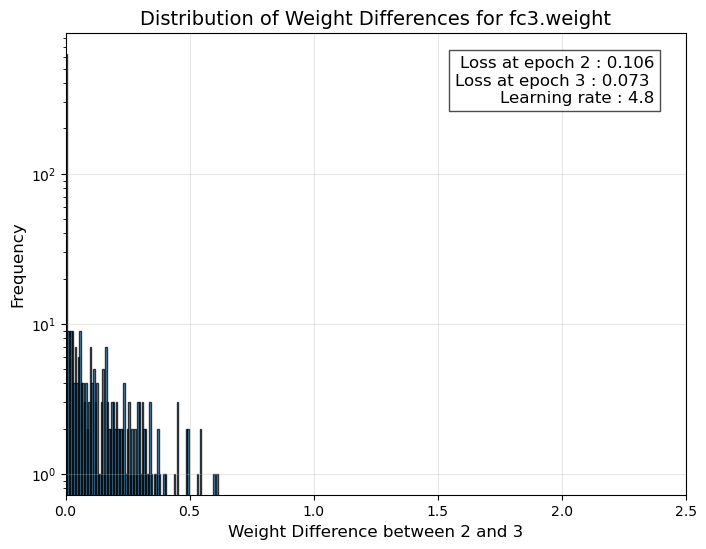

Learning rate: 4.9, Metadata ID: f37eca6f-9b3d-4796-b348-fc3d3b3acbf0
models\saved_models_metadataV2\metadata_f37eca6f-9b3d-4796-b348-fc3d3b3acbf0.json


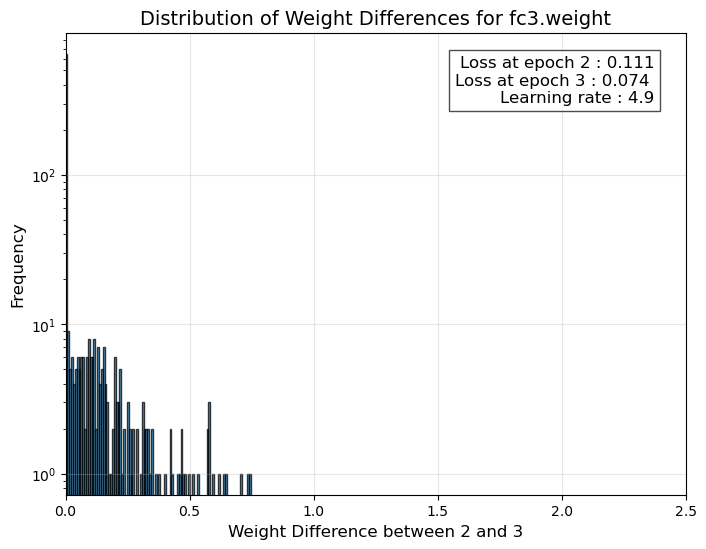

Learning rate: 5.0, Metadata ID: c44ed5f0-1ac8-4c19-a376-3680d55d239a
models\saved_models_metadataV2\metadata_c44ed5f0-1ac8-4c19-a376-3680d55d239a.json


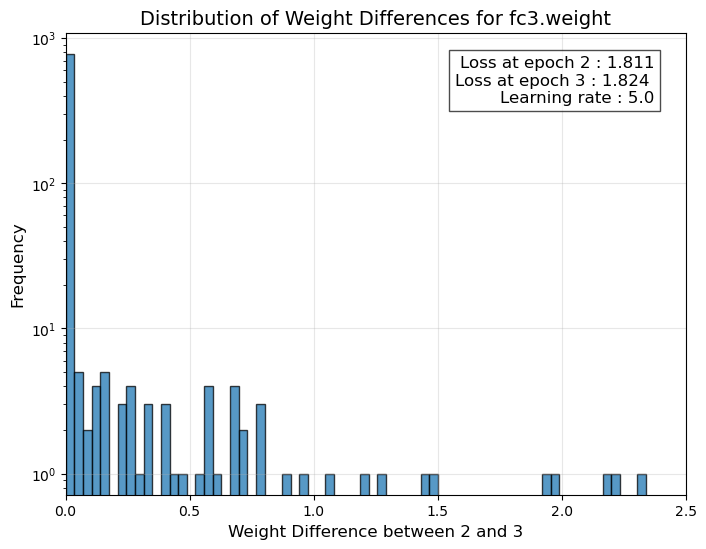

Learning rate: 5.1, Metadata ID: ff308d82-717d-468b-abe7-fc0400ac45c7
models\saved_models_metadataV2\metadata_ff308d82-717d-468b-abe7-fc0400ac45c7.json


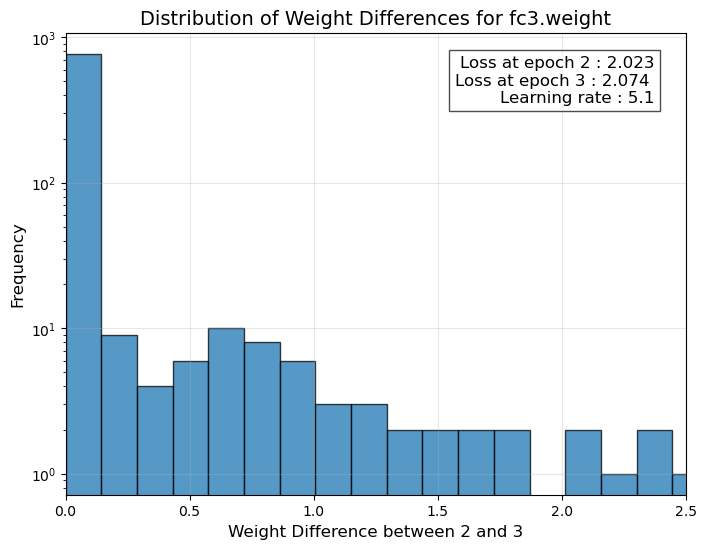

Learning rate: 5.2, Metadata ID: e6278f3c-2fd5-4e1f-b561-8c8cf1e65994
models\saved_models_metadataV2\metadata_e6278f3c-2fd5-4e1f-b561-8c8cf1e65994.json


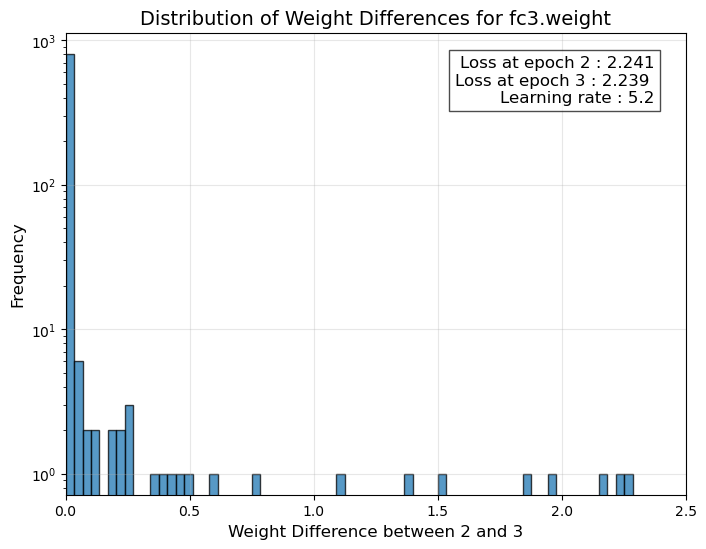

Learning rate: 5.3, Metadata ID: 9787707a-8a49-4d89-8bce-102274f962ea
models\saved_models_metadataV2\metadata_9787707a-8a49-4d89-8bce-102274f962ea.json


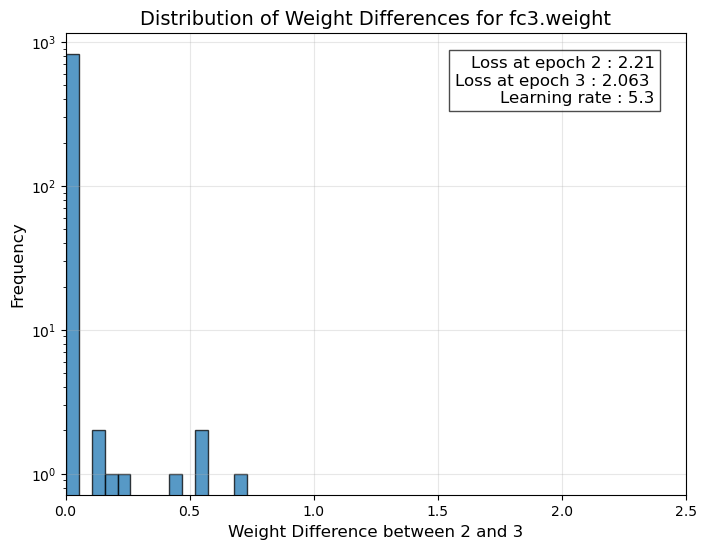

Learning rate: 5.4, Metadata ID: 525e2042-9ad9-4e93-a37a-5e86c1bb5c57
models\saved_models_metadataV2\metadata_525e2042-9ad9-4e93-a37a-5e86c1bb5c57.json


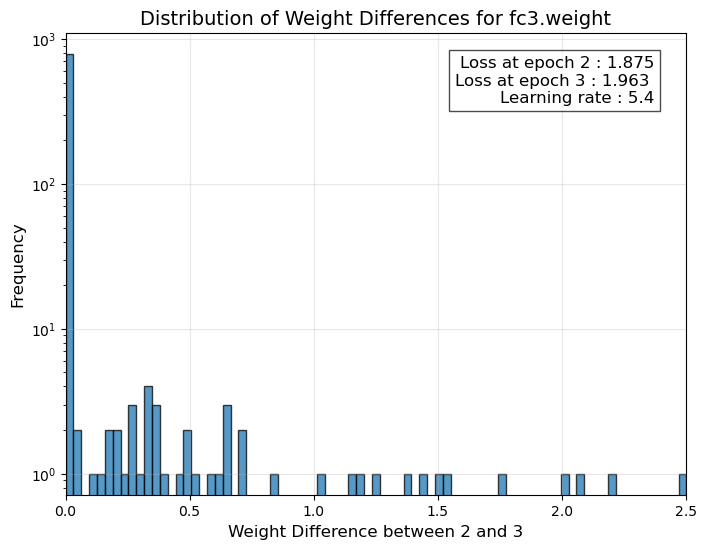

Learning rate: 5.5, Metadata ID: fdf6c55f-7ec0-422e-9285-a70ad960f09a
models\saved_models_metadataV2\metadata_fdf6c55f-7ec0-422e-9285-a70ad960f09a.json


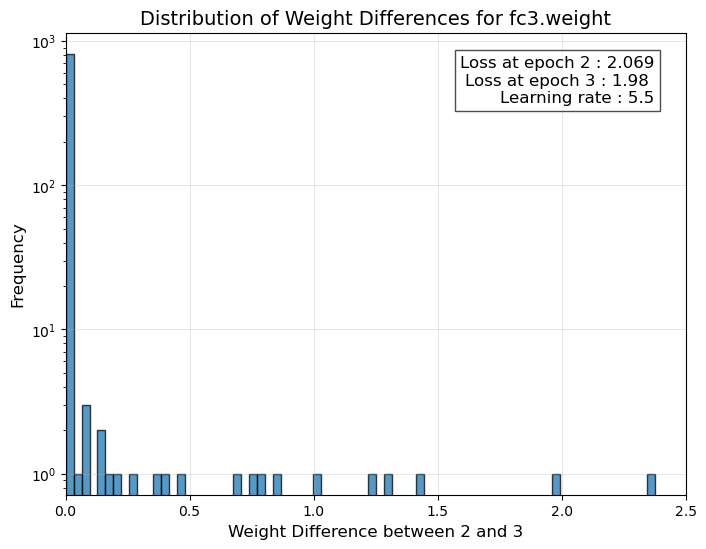

In [9]:
import os
import json
import re

# Pattern to extract metadata ID
pattern = r"metadata_(.+)\.json"

# List to store learning rates and corresponding metadata
metadata_with_lr = []

# Directory containing the metadata files
metadata_dir = "models/saved_models_metadataV2"

# Iterate over files in the metadata directory
for name in os.listdir(metadata_dir):
    metadata_path = os.path.join(metadata_dir, name)

    # Only process JSON files
    if name.endswith(".json"):
        with open(metadata_path, "r") as file:
            metadata = json.load(file)

        # Get learning rate
        learning_rate = metadata.get("learning_rate", None)

        # Extract metadata ID
        extracted_metadata = re.findall(pattern, name)

        if extracted_metadata:
            metadata_with_lr.append((learning_rate, extracted_metadata[0]))

# Sort metadata by learning rate (ascending)
metadata_with_lr.sort(key=lambda x: x[0] if x[0] is not None else float("inf"))

# Iterate over sorted metadata and call the plotting function
for learning_rate, metadata_id in metadata_with_lr:
    print(f"Learning rate: {learning_rate}, Metadata ID: {metadata_id}")
    plot_layer_weight_differences(metadata_id, 2, ("fc3",))